In [83]:
%matplotlib inline

In [84]:
import itertools
import collections

import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

plt.rcParams['figure.figsize'] = [12, 8]

# Explorative analysis of the training set

Read training data tsv:

In [85]:
train = pd.read_csv('../data/twitter-2016train-A.tsv', sep='\t',
                    header=None, index_col=0, names=['index', 'label', 'tweet'])

In [86]:
train.head()

,label,tweet
index,,
628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
628976607420645377,negative,@Microsoft how about you make a system that do...
629023169169518592,negative,I may be ignorant on this issue but... should ...
629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
629186282179153920,neutral,If I make a game as a #windows10 Universal App...


Distribution of the polarity labels:

## Distribution of polarity labels

<AxesSubplot:xlabel='label'>

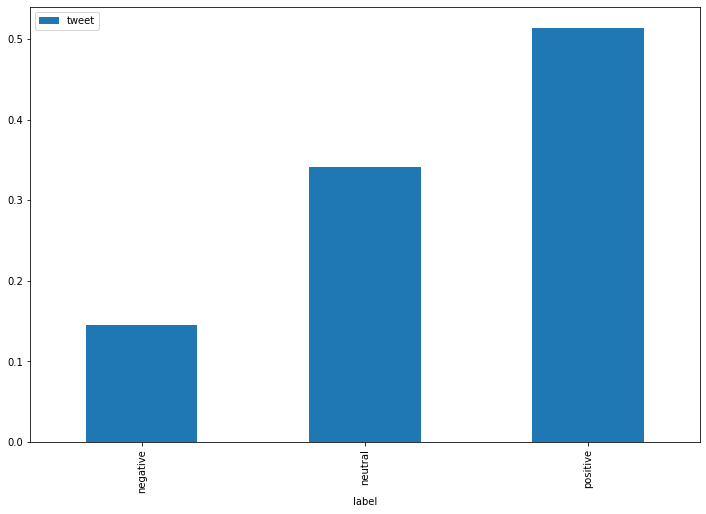

In [87]:
train.groupby('label').count().apply(lambda x: x / x.sum()).plot.bar()

The labels are imbalanced - negative tweets make up 15% of all data, positive ones more than 50%.

## Distribution of tweet lengths

In a first set, URLs are removed as they heavily bias the tweet length:

In [102]:
train['tweet'] = train['tweet'].str.strip() # strip leading/training whitespace
train['tweet'] = train['tweet'].str.replace(r'http\S+|www.\S+', '', case=False)

Check the distribution of tweet lengths (in characters):

In [90]:
train['tweet_len'] = train['tweet'].apply(len)
train['tweet_len'].describe()

count    5868.000000
mean      110.321575
std       125.880818
min        25.000000
25%        90.000000
50%       113.000000
75%       129.000000
max      7008.000000
Name: tweet_len, dtype: float64

Given the age of the data set, tweets should be restricted to 140 chars, longer tweets might might be faulty observations.

In [107]:
train_clean = train[train['tweet_len'] < 141]

In [106]:
len(train) - len(train_clean)

116

Removing tweets longer than 140 chars drops 116 observations from the training set.

In [93]:
train_clean['tweet_len'].describe()

count    5752.000000
mean      106.614395
std        25.220904
min        25.000000
25%        90.000000
50%       113.000000
75%       127.000000
max       140.000000
Name: tweet_len, dtype: float64

In [94]:
train_clean.groupby('label').describe()

tweet_len                                                        
             count        mean        std   min   25%    50%    75%    max
label                                                                     
negative     825.0  113.037576  24.003030  33.0  99.0  116.0  134.0  140.0
neutral     1974.0  107.605370  24.689389  27.0  91.0  114.0  128.0  140.0
positive    2953.0  104.157467  25.549236  25.0  87.0  110.0  122.0  140.0

The distribution of tweet lengths by polarity in the clean dataset is very similar, with positive tweets being slightly shorter than negative tweets.

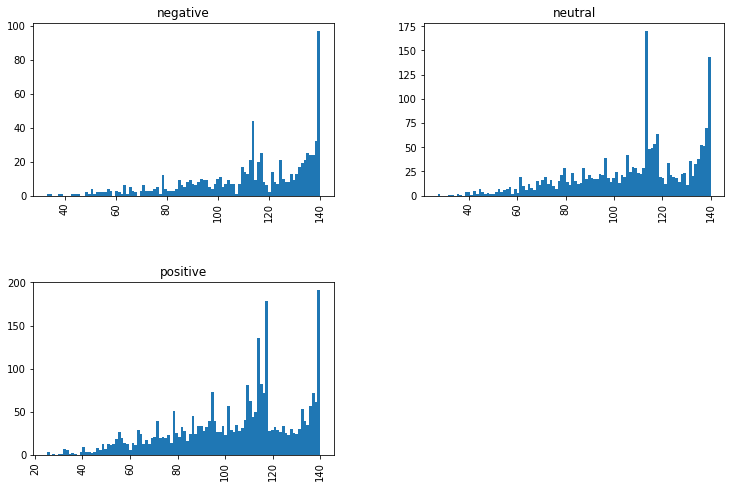

In [95]:
ax = train_clean.hist(by='label', bins=100, grid=True)

Creating a corpus from the training set:

In [96]:
corpus = list(itertools.chain(*train_clean['tweet'].str.split().values.tolist()))
counter = collections.Counter([w for w in corpus if w.lower() not in STOPWORDS])

The word cloud of the most common words in the corpus (excluding stop words)
shows an interesting snapshot of the time when the data was generated:

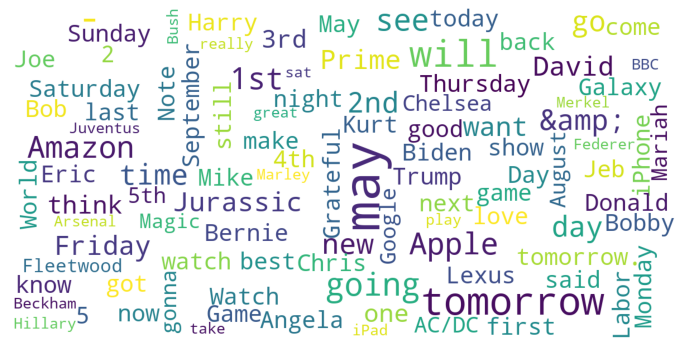

In [97]:
wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1234)
   
cloud = wordcloud.generate_from_frequencies(counter)

plt.axis('off')

plt.imshow(cloud)
plt.show()